In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
full = cv2.imread('DATA/sammy.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

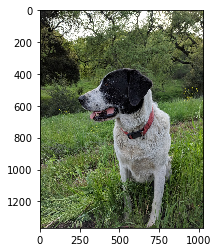

In [3]:
plt.imshow(full)

In [5]:
face = cv2.imread('DATA/sammy_face.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)

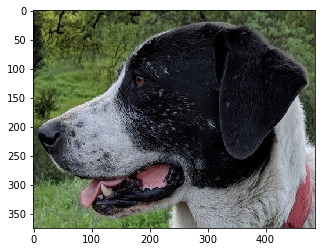

In [6]:
plt.imshow(face)

In [7]:
# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

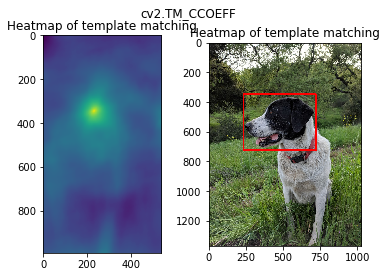

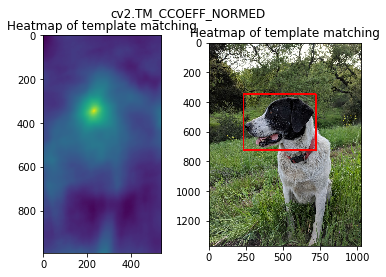

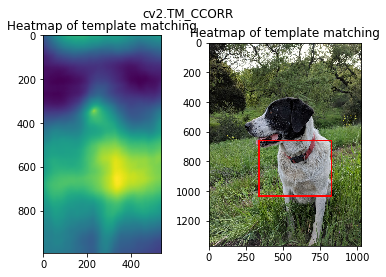

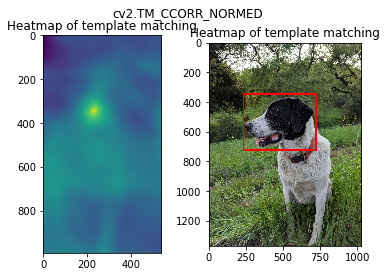

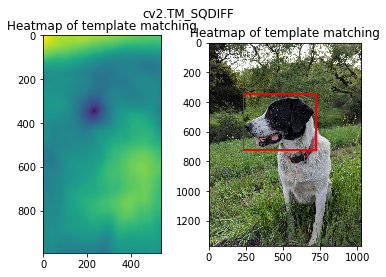

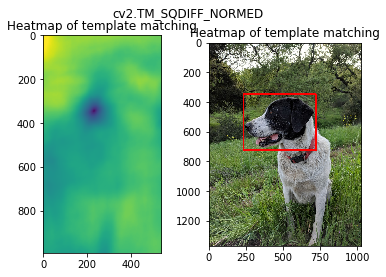

In [14]:
for i in methods:
    #CREATE COPY OF IMAGE
    full_copy = full.copy()
    
    method = eval(i)
    
    res = cv2.matchTemplate(full_copy, face, method)
    
    #Find min and max vals, min and mas locations
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    
    height,width,_ = face.shape
    bottom_right = (top_left[0] + width, top_left[1] + height)
    cv2.rectangle(full_copy, top_left, bottom_right, (255,0,0), 10)
    
    #PLOT
    plt.subplot(121)
    plt.imshow(res)
    plt.title("Heatmap of template matching")
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title("Heatmap of template matching")
    plt.suptitle(i)
    
    plt.show()
    
    print('\n\n')

In [9]:
my_method = eval('cv2.TM_CCOEFF')
res = cv2.matchTemplate(full, face, my_method)

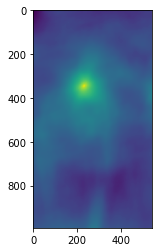

In [10]:
plt.imshow(res)